In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient


In [2]:
client = MongoClient('mongodb://localhost:27017/')
db = client['BDA']
collection = db['Customers']

In [3]:
required_fields = [
    "customerID", "gender", "SeniorCitizen", "Partner", "Dependents", 
    "tenure", "Contract", "PaperlessBilling", "PaymentMethod", 
    "MonthlyCharges", "TotalCharges", "Services"
]

In [4]:
query = {field: {"$exists": True} for field in required_fields}

In [5]:
documents_without_id = list(collection.find(query, {"_id": 0}))


In [6]:
for doc in documents_without_id:
    services = doc.pop("Services", {})
    for key, value in services.items():
        doc[f"Services.{key}"] = value  

In [7]:
df = pd.DataFrame(documents_without_id) 
df.to_csv("collection.csv")

In [8]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents     tenure  \
0         id7044    Male              0     Yes         No  15.208851   
1         id7045    Male              0      No        Yes  29.779905   
2         id7046  Female              0     Yes        Yes  34.546357   
3         id7047    Male              0      No         No  37.264434   
4         id7049  Female              1      No         No  31.188870   
...          ...     ...            ...     ...        ...        ...   
23418    id32038    Male              0      No         No  10.304650   
23419    id32039    Male              0      No        Yes  15.826004   
23420    id32040    Male              0      No        Yes  33.852572   
23421    id32041    Male              0     Yes        Yes  33.154407   
23422    id32042  Female              0      No         No  32.327198   

             Contract PaperlessBilling              PaymentMethod  \
0      Month-to-month             [No]    Credit card 

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23423 entries, 0 to 23422
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 23423 non-null  object 
 1   gender                     23423 non-null  object 
 2   SeniorCitizen              23423 non-null  int64  
 3   Partner                    23423 non-null  object 
 4   Dependents                 23423 non-null  object 
 5   tenure                     23423 non-null  float64
 6   Contract                   23423 non-null  object 
 7   PaperlessBilling           23423 non-null  object 
 8   PaymentMethod              23423 non-null  object 
 9   MonthlyCharges             23423 non-null  float64
 10  TotalCharges               23423 non-null  object 
 11  Services.PhoneService      23423 non-null  object 
 12  Services.MultipleLines     23423 non-null  object 
 13  Services.InternetService   23423 non-null  obj

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23423 entries, 0 to 23422
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 23423 non-null  object 
 1   gender                     23423 non-null  object 
 2   SeniorCitizen              23423 non-null  int64  
 3   Partner                    23423 non-null  object 
 4   Dependents                 23423 non-null  object 
 5   tenure                     23423 non-null  float64
 6   Contract                   23423 non-null  object 
 7   PaperlessBilling           23423 non-null  object 
 8   PaymentMethod              23423 non-null  object 
 9   MonthlyCharges             23423 non-null  float64
 10  TotalCharges               23423 non-null  object 
 11  Services.PhoneService      23423 non-null  object 
 12  Services.MultipleLines     23423 non-null  object 
 13  Services.InternetService   23423 non-null  obj

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

<H4>Creating the FUNCTIONS</H4>

In [118]:
def prep_churn_train (df):

    df = df.rename(columns=str.lower) # Rename columns to lower letters
    df.churn = (df.churn=='Yes').astype('int') # Label to numeric
    df['totalcharges'] = df['totalcharges'].replace({" ": "0.0"}).astype(float)
    df=df.rename_axis('custid').reset_index()
    # df['custid']=df['customerid'].str.strip().str[4:].astype(float)
    df = df.drop(['paperlessbilling',  'customerid'], axis=1) # Drop some features which aren't informative
    df = df.drop(['phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup',
               'deviceprotection','techsupport','streamingtv','streamingmovies'], axis=1)
    df = pd.get_dummies(df) # Categorical values to 1-hot ("one hot" encoding is a representation of categorical variables as binary vectors)
    
    df = df.astype(float) # Let's convert all data to float because some modules warn against other types
    
    
    print('')
    
    # Check for nulls
    null = df.isna().sum().sum()
    print (f'There are {null} null values')
    
    # Check for DataType
    dtype = df.dtypes.unique()[0]
    print (f'There are {dtype} dtype')
    
    print('')
    

    return df

Fun - prep_churn_new

In [119]:
def prep_churn_new (df):

    df = df.rename(columns=str.lower) # Rename columns to lower letters

    df['totalcharges'] = df['totalcharges'].replace({" ": "0.0"}).astype(float)
    df=df.rename_axis('index').reset_index()
    df['custid']=df['customerid'].str.strip().str[-4:].astype(float)

    df = df.drop(['paperlessbilling', 'customerid','index'], axis=1) # Drop some features which aren't informative
    df = df.drop([ 'services.phoneservice','services.multiplelines','services.internetservice','services.onlinesecurity','services.onlinebackup',
               'services.deviceprotection','services.techsupport','services.streamingtv','services.streamingmovies'], axis=1)
    df = pd.get_dummies(df) # Categorical values to 1-hot ("one hot" encoding is a representation of categorical variables as binary vectors)
   
    df = df.astype(float) # Let's convert all data to float because some modules warn against other types
    
   
    
    
    
    print('')
    
    # Check for nulls
    null = df.isna().sum().sum()
    print (f'There are {null} null values')
    
    # Check for DataType
    dtype = df.dtypes.unique()[0]
    print (f'There are {dtype} dtype')
    
    
    print('')

    return df

Fun - split_churn_train

In [120]:
def split_churn_train(df):

    label = 'churn'
    cstm = 'custid'

    x_train = df.drop(label, axis=1)
    x_train = x_train.drop(cstm, axis=1)
    y_train = df[label]
    cstm_train = df[cstm]
    
    return x_train,y_train,cstm_train

Fun - split_churn_new

In [121]:
def split_churn_new(df):
    cstm = 'custid'

    x_new = df.drop(cstm, axis=1)
    cstm_new = df[cstm]
    
    return x_new, cstm_new

Fun - training_random_forest

In [122]:
def training_random_forest(n,m,r,x_train,y_train):

    model = RandomForestClassifier(n_estimators=n, max_depth=m, random_state=r)
    model.fit(x_train, y_train)
    
    return model

Fun - prediction_random_forest

In [123]:
def prediction_random_forest(model,x_new,df_orig):

    y_new = model.predict(x_new) 
    y_new = pd.Series(y_new,name='predict')
    output = df_orig.join(y_new)
    
    return output

Fun - random_forest_feature_importance

In [124]:
def random_forest_feature_importance(model,x_new):

    feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
    features = x_new.columns # all the features
    stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
    print(stats.sort_values('importance', ascending=False)) # Sorting the data frame

    stats_sort = stats.sort_values('importance', ascending=True)
    stats_sort.plot(y='importance', x='feature', kind='barh')
    plt.title('Feature Importance of Random Forest')
    plt.show()

<H4>Load Data</H4>

Load churn_train

In [125]:
churn_train_orig = pd.read_csv('churn.csv')
churn_train_orig.shape

(7043, 21)

Load churn_new

In [126]:
churn_train_orig.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [127]:
churn_train_orig

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [128]:
churn_train_orig.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [129]:
churn_new_orig = pd.read_csv('collection.csv',index_col=0)
churn_new_orig.shape

(23423, 20)

<H4>Using the FUNCTIONS</H4>

Using prep_churn_train

In [130]:
churn_new_orig.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Services.PhoneService',
       'Services.MultipleLines', 'Services.InternetService',
       'Services.OnlineSecurity', 'Services.OnlineBackup',
       'Services.DeviceProtection', 'Services.TechSupport',
       'Services.StreamingTV', 'Services.StreamingMovies'],
      dtype='object')

In [131]:
churn_train = prep_churn_train(churn_train_orig)


There are 0 null values
There are float64 dtype



In [132]:
print(churn_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   custid                                   7043 non-null   float64
 1   seniorcitizen                            7043 non-null   float64
 2   tenure                                   7043 non-null   float64
 3   monthlycharges                           7043 non-null   float64
 4   totalcharges                             7043 non-null   float64
 5   churn                                    7043 non-null   float64
 6   gender_Female                            7043 non-null   float64
 7   gender_Male                              7043 non-null   float64
 8   partner_No                               7043 non-null   float64
 9   partner_Yes                              7043 non-null   float64
 10  dependents_No                            7043 no

Using prep_churn_new

In [133]:
churn_new = prep_churn_new(churn_new_orig)


There are 0 null values
There are float64 dtype



Using split_churn_train

In [134]:
print(churn_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23423 entries, 0 to 23422
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seniorcitizen                            23423 non-null  float64
 1   tenure                                   23423 non-null  float64
 2   monthlycharges                           23423 non-null  float64
 3   totalcharges                             23423 non-null  float64
 4   custid                                   23423 non-null  float64
 5   gender_Female                            23423 non-null  float64
 6   gender_Male                              23423 non-null  float64
 7   partner_No                               23423 non-null  float64
 8   partner_Yes                              23423 non-null  float64
 9   dependents_No                            23423 non-null  float64
 10  dependents_Yes                           23423

In [135]:
x_train, y_train, cstm_train = split_churn_train(churn_train)

Using split_churn_new

In [136]:
x_new, cstm_new = split_churn_new(churn_new)

Using training_random_forest

In [137]:
model = training_random_forest(100,3,1,x_train,y_train)

Using prediction_random_forest

In [138]:
churn_new_orig_with_predict = prediction_random_forest(model,x_new,churn_new_orig)
churn_new_orig_with_predict.to_csv('churn_new_orig_with_predict.csv')

Using random_forest_feature_importance

                                    feature  importance
10                  contract_Month-to-month    0.257951
1                                    tenure    0.200549
15           paymentmethod_Electronic check    0.156433
2                            monthlycharges    0.110083
12                        contract_Two year    0.106681
3                              totalcharges    0.070612
11                        contract_One year    0.045241
8                             dependents_No    0.010670
16               paymentmethod_Mailed check    0.010432
0                             seniorcitizen    0.010344
9                            dependents_Yes    0.010277
7                               partner_Yes    0.004391
6                                partner_No    0.004098
14    paymentmethod_Credit card (automatic)    0.002002
5                               gender_Male    0.000099
4                             gender_Female    0.000087
13  paymentmethod_Bank transfer (automatic)    0

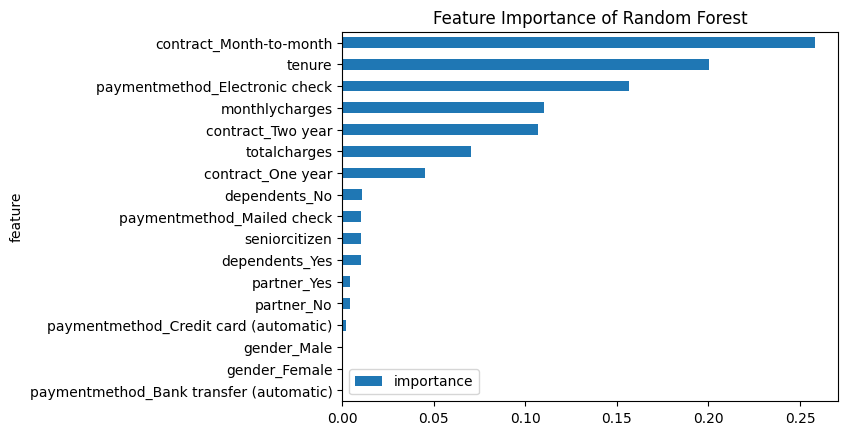

In [139]:
random_forest_feature_importance(model,x_new)

<H4>Accuracy</H4>

In [140]:
y_train_pred_RandomForest = model.predict(x_train) 
test_acc = accuracy_score(y_train, y_train_pred_RandomForest)
test_acc

0.7803492829760046